<a href="https://colab.research.google.com/github/sameersat96/Yes-Bank-Stock-Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**


**Yes Bank Limited is an Indian private sector bank headquartered in Mumbai, India and was founded by Rana Kapoor and Ashok Kapur in 2004.
It offers wide range of differentiated products for corporate and retail customers through retail banking and asset management services. On 5 March 2020, in an attempt to avoid the collapse of the bank, which had an excessive amount of bad loans, the Reserve Bank of India (RBI) took control of it.**

**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.**

# **Importing requrired Libraries**

In [5]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [6]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/Supervised learning ML- capstone 2/Copy of data_YesBank_StockPrices.csv")

In [8]:
# First gothrough dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# **Data description**

Dataset contains Yes Bank stock monthly prices since it listed on stock exchange. 

Following are its features:-

* **Date**: In our data its monthly observation of stock since it listed.
* **Open**: The price a stock when the stock exchange open for the day.
* **High**: The maximum price of a stock attain during given period of time.
* **Low**: The minimum price of a stock attain during given period of time.
* **Close**: The price of a stock when the stock exchange closed for the day.


# **Data Preprocessing**

In [9]:
#first look of data
df.head(5)  # first 5 rows

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [10]:
# last 5 rows
df.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


Yes bank stock listed on month of july 2005.

we have data available from july 2005 to november 2020

In [11]:
#Lets have look at shape of data
df.shape


(185, 5)

In [12]:
# details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Need to change Date column to datetime.

seems like no missing value in above data.

In [13]:
#Summary of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Chekcing for missing values**

In [14]:
df.isnull().mean()

Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

-NO missing values in dataset

In [15]:
 #Checking duplicate rows
 df.duplicated().mean()

0.0

**Changing data type to required format**

In [16]:
#Changing date colunn datatype to datetime format.
from datetime import datetime

#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [17]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


**Checking datatype again**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


-----YES!!! datatype change into reqiured format

# **Exploratory data analysis**

!!! now its time to visualise things.

firstly will see how closing price change with given time

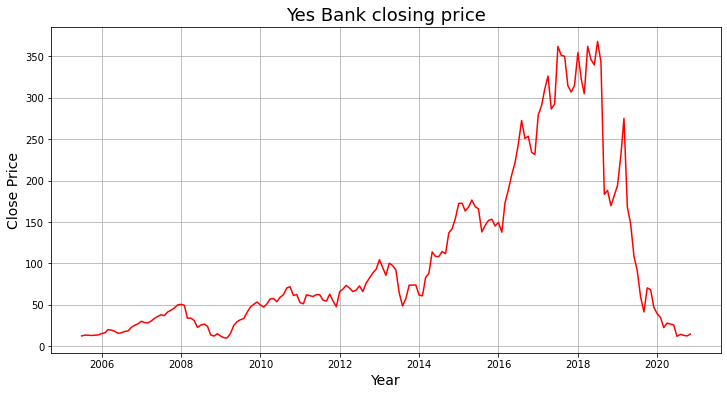

In [19]:
#Ploting close price of stock vs time
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price' ,fontsize=14)
plt.plot(df['Date'], df['Close'] , color="red")
plt.title('Yes Bank closing price', fontsize=18)

plt.show()

After 2018 yes bank stock price fall beacuse of fraud case regarding to Rana kapoor

**VIsualize all close,high,open and low price of stock**

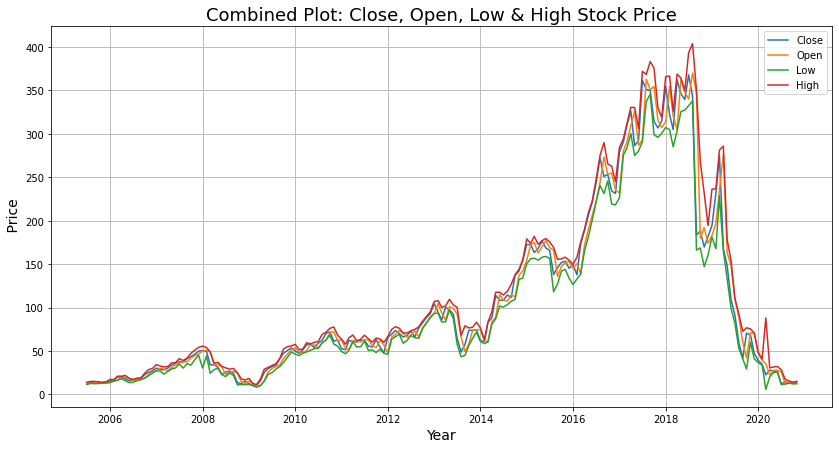

In [20]:
plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel(' Price' ,fontsize=14)
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=18)
plt.show()

we can see in 2017 to 2019 there can be high action seen because of difference in high and low lines.

Closing price of stock price is always important so i take close price as dependent variable 

# **Distribution of dependant variable  Close Price of stock.**

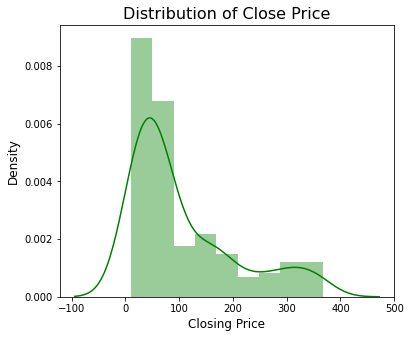

In [21]:
# Now will see distribution of close price to know about normal distribution
# i use distplot for that
plt.figure(figsize=(6,5))
sns.distplot(df['Close'],color='green')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

It is rightly skewed distribution.

need to go with log transformation to make it normal distribution

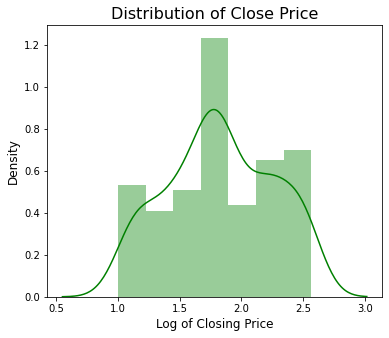

In [22]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']),color='green')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Now it seems more normal 

# **Distribution of numerical features High, Low and Open price of stock.**

In [23]:
df.describe().columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [24]:
# List of independent features
numerical_features = list(set(df.describe().columns)-{'Close'})
numerical_features

['Open', 'High', 'Low']

<function matplotlib.pyplot.show>

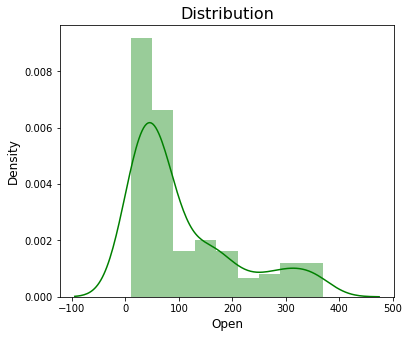

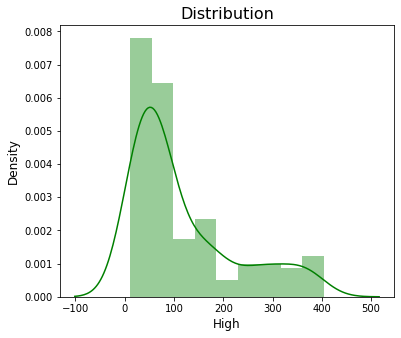

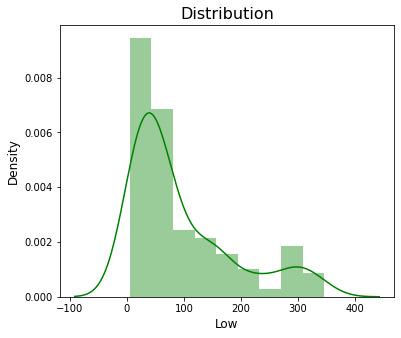

In [25]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

* It looks all numerical features are rightly skewed.
* Apply log transformation to make normal.

<function matplotlib.pyplot.show>

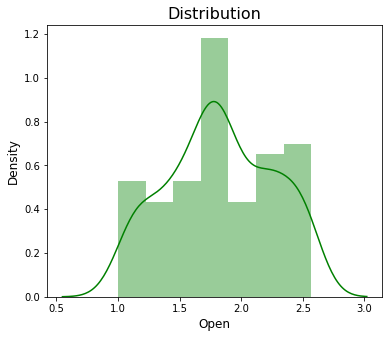

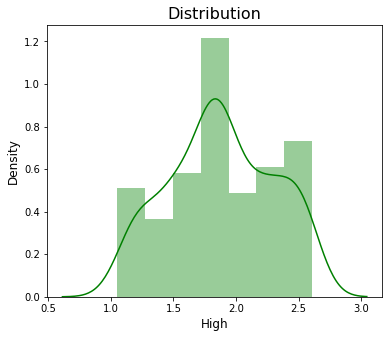

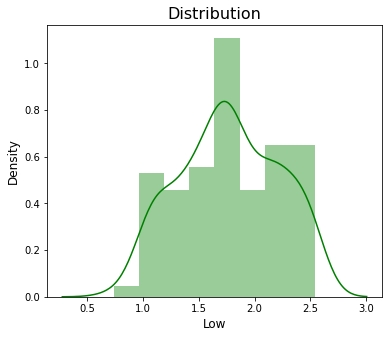

In [26]:
# Applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df[col]), color='green')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

--Now looks like  normally distrubuted

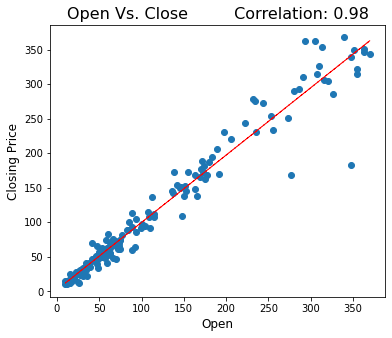

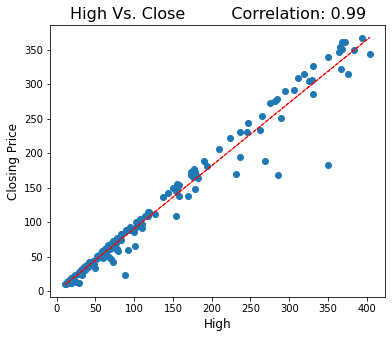

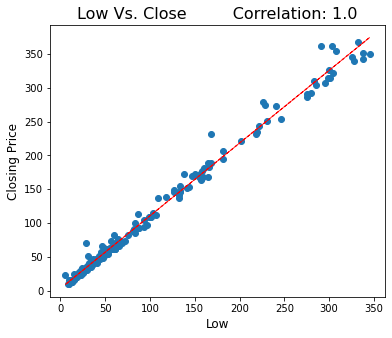

In [27]:
# Now to plot scatter plot with best fit line.
for col in numerical_features:
   fig = plt.figure(figsize=(6, 5))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col, fontsize=12)
   plt.ylabel('Closing Price', fontsize=12)
   ax.set_title(col + ' Vs. Close' + '         Correlation: ' + str(round(correlation,2)), fontsize=16)
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)

Text(0.5, 1.0, 'Correlation Map')

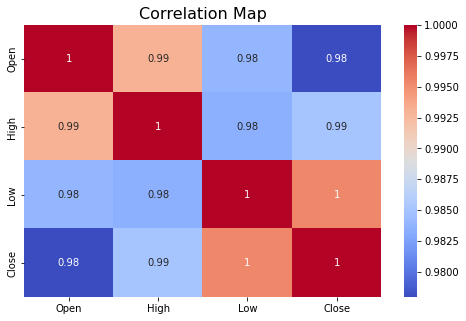

In [28]:
#Lets find correlation with heatmap
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation Map", fontsize=16)

*  There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

*  To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

*  so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

In [29]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
  vif = pd.DataFrame()
  vif['Variables'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  return (vif)

In [30]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


We have very high VIF in our dataset so, we have to drop one them which is least correlated with dependent variable

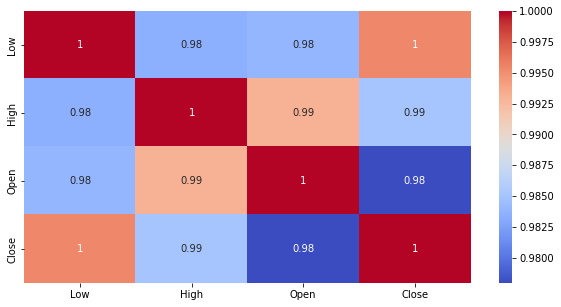

In [93]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['Low','High','Open','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Now, we'll drop Open feature from the VIF matrix.

In [94]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close','Average','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


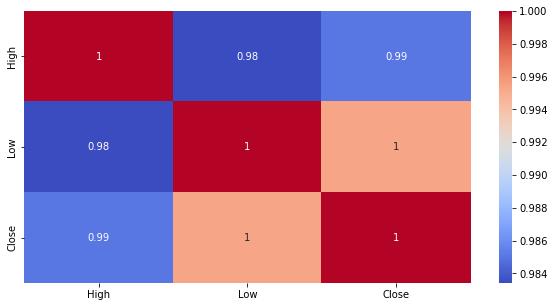

In [96]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['High','Low','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Our final dropping variable will be **High** feature because it has less correlation with dependent variable in comparison with dependet variable(Close).

We've dropped 3 features from our dataset it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.
 
So, we preferred to drop the features and move forward with the **Low** Variable.

# **Data transformation**

**Splitting data**

X = Independent variable


Y = Dependent variable

In [97]:
# Splitting our data into Dependent and Independent Variables
X = df.drop(columns=['Close','Date'])
y = df['Close']

**Normalization**

## data must be normally distributed before apply normalization..

Normalization is one of the feature scaling techniques. We particularly apply normalization when the data is skewed on the either axis i.e. when the data does not follow the gaussian distribution.In normalization, we convert the data features of different scales to a common scale which further makes it easy for the data to be processed for modeling. Thus, all the data features(variables) tend to have a similar impact on the modeling portion.

In [32]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

**splitting train test data with 80-20**

In [33]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [34]:
#shape of training dataset.
X_train.shape

(148, 3)

In [35]:
#shape of testing dataset.
X_test.shape

(37, 3)

# **1) Linear Regression**

In [36]:
#fit data into Linear Regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [37]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 4)

0.8147

In [38]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 4)

0.8226

In [39]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [98]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(10**y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [100]:
test_df[' Predicted Closing Price'] = 10**y_pred
test_df.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


In [41]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

-Time to know about metrics

**Evaluation Metrics of Linear Regression:**

In [42]:
# Test Performance of linear regression model
print("MSE :",round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),4))
print("R2 :",round(r2_score(y_test, y_pred), 4))


MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
R2 : 0.8226


**Linear Regression: Actual Vs. Predicted**

--Lets know actual and model predicted curve

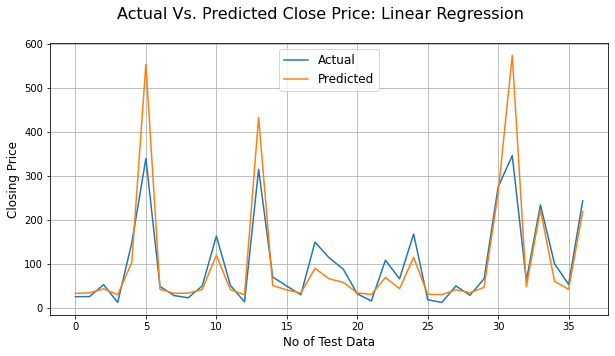

In [43]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

There is much value difference seen spikes of price

# **2) Lasso Regression**

In [44]:
#fit data into Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1,max_iter=3000)  #will keep alpha=0.1 and max iteration upto 3000
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [45]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,y_train),4)

0.7596

-it looks less accuracy than linear regression

In [46]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)


In [47]:
y_pred_lasso

array([1.59885328, 1.60997773, 1.68949351, 1.56874001, 1.97344962,
       2.50656093, 1.68566448, 1.59981089, 1.60579373, 1.67686268,
       2.01562595, 1.67079926, 1.56599398, 2.42326589, 1.73700316,
       1.66886904, 1.60484921, 1.92532022, 1.82059101, 1.78055609,
       1.61048878, 1.57288435, 1.83725499, 1.68838669, 1.99972092,
       1.57880718, 1.56982374, 1.66984062, 1.61279255, 1.71366385,
       2.26101503, 2.52324602, 1.72444246, 2.22095436, 1.79381669,
       1.67767545, 2.20353159])

In [48]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

**Evaluation Metrics of Lasso Regression:**

In [49]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0436
RMSE : 0.2088
MAE : 0.1672
MAPE : 0.1099
R2 : 0.755


**Lasso Regression: Actual Vs. Predicted**

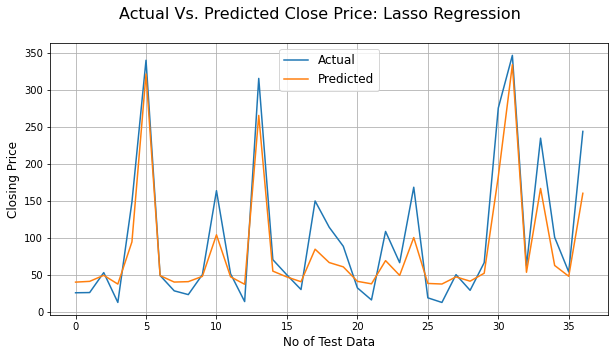

In [50]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

As we see spike get accurately predicted in lasso but flat prices predication varies much

# **Cross Validation on Lasso Regression**

In [51]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [52]:
# Hyper-Parameter Tuning for Lasso Regression

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [53]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 4))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

The best fit alpha value is found out to be : 0.01
The negative mean squared error for is:  -0.0352


In [55]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

In [56]:
y_pred_lasso_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [57]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [103]:
test_df['lasso Predicted Closing Price'] = 10**y_pred_lasso_cv
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,33.214715
179,25.60,34.457302
66,52.59,44.607474
40,12.26,30.472487
166,147.95,105.605617


**Evaluation Metrics of Lasso Regression after Validation:**

In [58]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


After validation accuracy increase

**Lasso Regression After Validation: Actual Vs. Predicted**

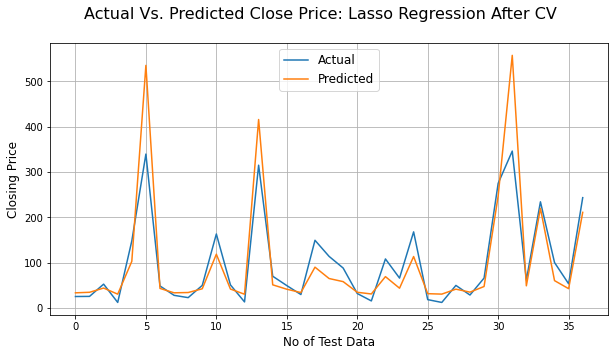

In [59]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **3) Ridge Regression**

In [60]:
#fit data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [61]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),4)

0.8147

In [62]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [63]:
y_pred_ridge

array([1.51737287, 1.53212183, 1.63527718, 1.47540733, 2.01476992,
       2.74386608, 1.62612711, 1.518483  , 1.52357555, 1.62095755,
       2.07724424, 1.61560489, 1.47293231, 2.63690439, 1.70389154,
       1.61036116, 1.52500609, 1.95408562, 1.81948322, 1.76419247,
       1.53164246, 1.48042498, 1.83887238, 1.63935141, 2.05988924,
       1.49005809, 1.47677062, 1.61400144, 1.53538386, 1.66903264,
       2.41743053, 2.75941508, 1.68270132, 2.34886131, 1.78252064,
       1.62415831, 2.34089158])

In [64]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

**Ridge Regression: Actual Vs. Predicted**

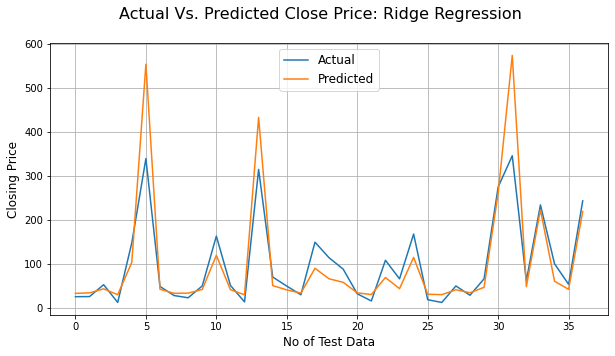

In [65]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Cross Validation on Ridge Regression**

In [66]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [67]:
ridge_model_cv.fit(X_train,y_train)




GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [68]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 10
The negative mean squared error for is:  -0.035


In [69]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

In [70]:
y_pred_ridge_cv

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [71]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [102]:
test_df['Ridge Predicted Closing Price'] = 10**y_pred_ridge_cv
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,33.214715
179,25.60,34.457302
66,52.59,44.607474
40,12.26,30.472487
166,147.95,105.605617


**Evaluation Metrics of Ridge Regression after Validation:-**

In [72]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 4))

MSE : 0.0325
RMSE : 0.1804
MAE : 0.1531
MAPE : 0.0968
R2 : 0.8172


**Ridge Regression After Validation: Actual Vs. Predicted**

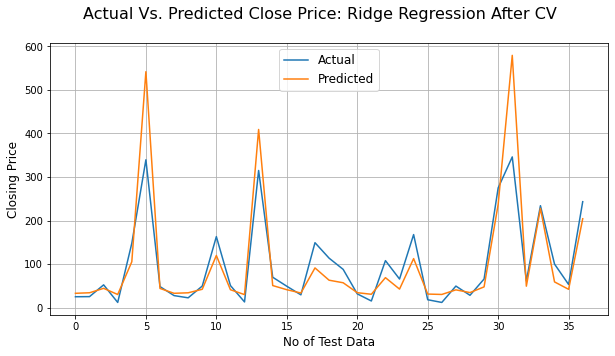

In [73]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **4) Elastic Net Regression**

In [74]:
#fit data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [75]:
#accuracy of lasso regression model
round(elastic.score(X_train,y_train),3)

0.796

In [76]:
#prediction of test data.
y_pred_elastic = elastic.predict(X_test)

In [77]:
y_pred_elastic

array([1.56086628, 1.57468956, 1.67199754, 1.52786225, 1.99947735,
       2.620323  , 1.66975894, 1.56099604, 1.57327896, 1.65381518,
       2.04818128, 1.64463306, 1.52491149, 2.51497513, 1.72340633,
       1.64475613, 1.56826762, 1.94476918, 1.80713181, 1.769077  ,
       1.57643749, 1.53436335, 1.83898052, 1.65870367, 2.02548893,
       1.53981805, 1.52917355, 1.64223008, 1.57915854, 1.69956403,
       2.3103639 , 2.64491655, 1.71211439, 2.29131841, 1.78218876,
       1.65297013, 2.25223609])

In [78]:
np.array(y_pred)

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [79]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0364
RMSE : 0.1908
MAE : 0.1574
MAPE : 0.1024
R2 : 0.7955


**Elastic Net: Actual Vs. Predicted**

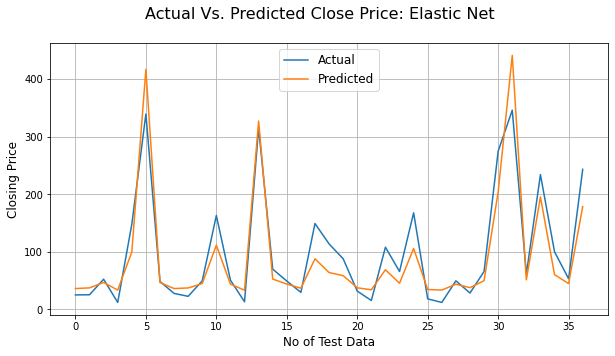

In [80]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Cross Validation on Elastic Net**

In [81]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=5)

In [82]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [83]:
elastic_model_cv.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [84]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 1
The negative mean squared error for is:  -0.037


In [85]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

In [86]:
y_pred_elastic_cv

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [87]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [104]:
test_df['Elastic net Predicted Closing Price'] = 10**y_pred_elastic_cv
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
16,25.32,33.214715
179,25.60,34.457302
66,52.59,44.607474
40,12.26,30.472487
166,147.95,105.605617


**Evaluation Metrics of Elastic Net after Validation:**

In [88]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 4))

MSE : 0.0322
RMSE : 0.1795
MAE : 0.1528
MAPE : 0.0968
R2 : 0.819


**Elastic Net After Validation: Actual Vs. Predicted**

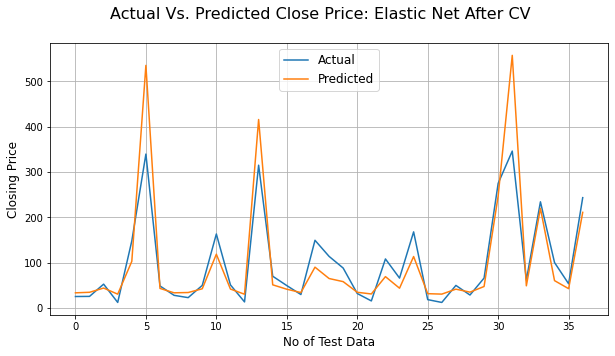

In [89]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Evaluation Matrics Comparison:**

In [128]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred),4)
    R2 = round(r2_score(y_test, y_pred), 4)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2
  
    
    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df



In [129]:
model = [linear_reg, lasso_reg, ridge_reg, elastic]

In [130]:
# now pass through function
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
3,Lasso,0.0436,0.2088,0.1672,0.1099,0.7550
2,ElasticNet,0.0364,0.1908,0.1574,0.1024,0.7955
1,Ridge,0.0316,0.1777,0.1513,0.0954,0.8225
0,LinearRegression,0.0316,0.1777,0.1513,0.0954,0.8226


# **Conclusion**

*  Target variable(dependent variable) strongly dependent on independent variables
*  We get maximum accuracy of 82%
*  Linear regression and Ridge regression get almost same R squared value
*  Whereas Lasso model shows lowest R squared value and high MSE,RMSE,MAE,MAPE